In [6]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
inpTrain = np.zeros((90,4))
inpTrain[0:30,:] = iris.data[0:30,:]
inpTrain[30:60,:] = iris.data[50:80,:]
inpTrain[60:90,:] = iris.data[100:130,:]
targetTrain = np.zeros((90,))
targetTrain[0:90] = iris.target[0:130]


ValueError: could not broadcast input array from shape (130,) into shape (90,)

In [2]:
def convertTarget(dataTarget):
    #diubah menjadi bentuk biner
    if dataTarget == 0:
        target = np.array([[0,0]])
    elif dataTarget == 1:
        target = np.array([[0,1]])
    elif dataTarget == 2:
        target = np.array([[1,0]])
    else:
        target = np.array([[1,1]])
    return target

In [3]:
def convertOutput(outputNN):
    if outputNN[0,0] < 0.5 and outputNN[0,1] < 0.5 :
        outReal = 0
    elif outputNN[0,0] < 0.5 and outputNN[0,1] >= 0.5 :
        outReal = 1
    elif outputNN[0,0] >= 0.5 and outputNN[0,1] < 0.5 :
        outReal = 2
    else:
        outReal = 3
    return outReal

In [4]:
def initNN(numInput,numHidden,numOutput):
    w = np.random.rand(numInput,numHidden)
    v = np.random.rand(numHidden+1,numOutput)
    return (w,v)

def sigmoidFn(x):
    return 1/(1+np.exp(-x))

In [5]:
def activationComputation(inp,weight):
    netInput = inp.dot(weight)
    outputActivation = sigmoidFn(netInput)
    return outputActivation

In [6]:
def updateV(target,outputNN,dataHidden,v,alpha):
    (m,n) = outputNN.shape
    (p,q) = v.shape
    tempDeltaV = np.zeros((m,n))
    deltaV = np.zeros((p,q))
    tempDeltaV[0,0] = (target[0,0]-outputNN[0,0])*outputNN[0,0]*(1-outputNN[0,0])
    tempDeltaV[0,1] = (target[0,1]-outputNN[0,1])*outputNN[0,1]*(1-outputNN[0,1])
    for i in range(p):
        for j in range(q):
            deltaV[i,j] = alpha*tempDeltaV[0,j]*dataHidden[0,i]
    v+=deltaV
    return (v,tempDeltaV)    

In [7]:
def updateW(dataInput,outputHidden,tempDeltaV,v,w,alpha):
    (m,n) = v.shape
    tempV = v[1:m,:]
    tempV = tempV.T
    tempDeltaY = tempDeltaV.dot(tempV)
    (p,q) = w.shape
    deltaW = np.zeros((p,q))
    for i in range(p):
        for j in range(q):
            deltaW[i,j] = alpha*tempDeltaY[0,j]*dataInput[0,i]*(outputHidden[0,j]*(1-outputHidden[0,j]))
    w=w+deltaW
    return (w)
    

In [8]:
def errorIterasi(target,outputNN):
    (m,n) = target.shape
    tempOut = np.zeros((m,n))
    if outputNN[0,0]<0.5:
        tempOut[0,0] = 0
    if outputNN[0,0]>=0.5:
        tempOut[0,0] = 1
    if outputNN[0,1]<0.5:
        tempOut[0,1] = 0
    if outputNN[0,1]>=0.5:
        tempOut[0,1] = 1
    tempError = np.sqrt(((tempOut[0,0]-target[0,0])**2)+((tempOut[0,1]-target[0,1])**2))
    return (tempError)

In [9]:
def trainNN(dataIn,dataTarget,numHidden,numOutput,epoch,learningRate):
    import matplotlib.pyplot as plt
    %matplotlib inline
    (numData,numInput) = dataIn.shape
    numInput += 1
    (w,v) = initNN(numInput,numHidden,numOutput)
    (numData,numFeature) = dataIn.shape
    oldV = np.zeros((numHidden+1,numOutput))
    i=0
    errorData = 100
    while i<epoch and errorData >0.01:
        count = 0
        errorData = 0
        for j in range(numData):
            dataInp = dataIn[count,:]
            (m,) = dataInp.shape
            dataInput = np.ones((1,m+1))
            dataInput[0,1:] = dataInp[:]
            outHidden = activationComputation(dataInput,w)
            dataHidden = np.ones((1,numHidden+1))
            dataHidden[0,1:] = outHidden
            outNN = activationComputation(dataHidden,v)
            t = dataTarget[count]
            target = convertTarget(t)
            errorData+=errorIterasi(target,outNN)
            oldV=v
            (v,deltaV) = updateV(target,outNN,dataHidden,v,learningRate)
            w = updateW(dataInput,outHidden,deltaV,oldV,w,learningRate)
            count+=1
        errorData = errorData/numData
        plt.plot(i,errorData,"or")
        i+=1
    plt.show()
    return (w,v)

In [18]:
def testNN(dataIn,w,v):
    (numData,numInput) = dataIn.shape
    (m,numHidden) = w.shape
    count = 0
    for i in range(numData):
        dataInp = dataIn[i,:]
        (m,) = dataInp.shape
        dataInput = np.ones((1,m+1))
        dataInput[0,1:] = dataInp[:]
        outHidden = activationComputation(dataInput,w)
        dataHidden = np.ones((1,numHidden+1))
        dataHidden[0,1:] = outHidden
        outNN = activationComputation(dataHidden,v)
        res = convertOutput(outNN)
        print("data ke-",i,"=",res)
        if i in range(0,50):
            if res == 0:
                count+=1
        if i in range(50,100):
            if res ==1:
                count+=1    
        if i in range(100,150):
            if res == 2:
                count+=1
    print("Akurasi=",(count/150)*100)

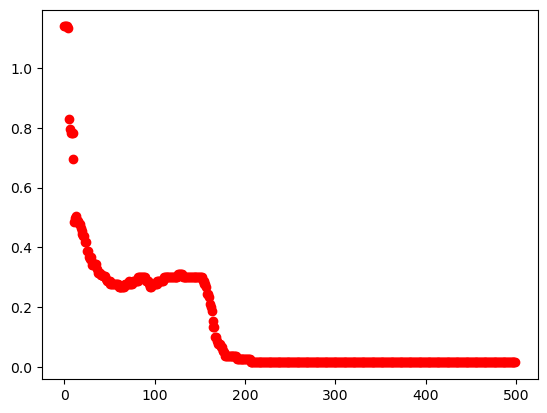

In [11]:
(w,v) = trainNN(inpTrain,targetTrain,8,2,500,0.05)


In [20]:
testNN(iris.data,w,v)

data ke- 0 = 0
data ke- 1 = 0
data ke- 2 = 0
data ke- 3 = 0
data ke- 4 = 0
data ke- 5 = 0
data ke- 6 = 0
data ke- 7 = 0
data ke- 8 = 0
data ke- 9 = 0
data ke- 10 = 0
data ke- 11 = 0
data ke- 12 = 0
data ke- 13 = 0
data ke- 14 = 0
data ke- 15 = 0
data ke- 16 = 0
data ke- 17 = 0
data ke- 18 = 0
data ke- 19 = 0
data ke- 20 = 0
data ke- 21 = 0
data ke- 22 = 0
data ke- 23 = 0
data ke- 24 = 0
data ke- 25 = 0
data ke- 26 = 0
data ke- 27 = 0
data ke- 28 = 0
data ke- 29 = 0
data ke- 30 = 0
data ke- 31 = 0
data ke- 32 = 0
data ke- 33 = 0
data ke- 34 = 0
data ke- 35 = 0
data ke- 36 = 0
data ke- 37 = 0
data ke- 38 = 0
data ke- 39 = 0
data ke- 40 = 0
data ke- 41 = 0
data ke- 42 = 0
data ke- 43 = 0
data ke- 44 = 0
data ke- 45 = 0
data ke- 46 = 0
data ke- 47 = 0
data ke- 48 = 0
data ke- 49 = 0
data ke- 50 = 1
data ke- 51 = 1
data ke- 52 = 1
data ke- 53 = 1
data ke- 54 = 1
data ke- 55 = 1
data ke- 56 = 1
data ke- 57 = 1
data ke- 58 = 1
data ke- 59 = 1
data ke- 60 = 1
data ke- 61 = 1
data ke- 62 = 1
da